##### This notebook will generate the mutation map for Panel C

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import mdtraj as md
import json
import pathlib
import os

## 1. Import json + pdb paths, plddt values, and rmsd values

In [2]:
path_to_models = '/Users/ssolieva/Desktop/comp_mount/colabfold/CH01_single_mutants/results/'

In [3]:
residues_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] # mutations

In [5]:
# these files were generated at: /home/ssolieva/Desktop/colabfold/CH01_single_mutants/
path_ = '/Users/ssolieva/Desktop/Kulp_lab/projects/figures/ch01/single_mutants/'
overall_list_of_pdbs  = np.load(f'{path_}overall_list_of_pdbs.npy')
overall_list_of_jsons = np.load(f'{path_}overall_list_of_jsons.npy')
overall_plddt_avg     = np.load(f'{path_}/overall_plddt_avg.npy')
overall_rmsd_values   = np.load(f'{path_}overall_rmsd_values.npy')

In [5]:
len(overall_list_of_pdbs[4])

1300

make a list of pdb paths and json paths for each model/seed

In [6]:
#overall_list_of_jsons = []
#overall_list_of_pdbs  = []
#for res in range(len(residues_list)):
#    resi = residues_list[res]
#    list_of_jsons = []
#    list_of_pdbs  = []
#    for seq in range(26):
#        print(resi, seq)
#        for model in range(1,6):
#            for seed in range(10):
#                for anyrank in range(51):
#                    if anyrank <= 9:
#                        json_path = f'{path_to_models}CH01_HC_{seq}{resi}_LC_scores_rank_00{anyrank}_alphafold2__multimer_v3_model_{model}_seed_00{seed}.json'
#                        pdb_path  = f'{path_to_models}CH01_HC_{seq}{resi}_LC_unrelaxed_rank_00{anyrank}_alphafold2_multimer_v3_model_{model}_seed_00{seed}.pdb'
#                        if os.path.isfile(json_path) == True:
#                            #print(pdb_path)
#                            list_of_jsons.append(json_path)
#                            list_of_pdbs.append(pdb_path)
#                            #print('yes', json_path)
#                    if anyrank > 9:
#                        json_path = f'{path_to_models}CH01_HC_{seq}{resi}_LC_scores_rank_0{anyrank}_alphafold2_multimer_v3_model_{model}_seed_00{seed}.json'
#                        pdb_path  = f'{path_to_models}CH01_HC_{seq}{resi}_LC_unrelaxed_rank_0{anyrank}_alphafold2_multimer_v3_model_{model}_seed_00{seed}.pdb'
#                        if os.path.isfile(json_path) == True:
#                            #print(pdb_path)
#                            list_of_jsons.append(json_path)
#                            list_of_pdbs.append(pdb_path)
#    overall_list_of_jsons.append(list_of_jsons)
#    overall_list_of_pdbs.append(list_of_pdbs)
#    
#np.save("overall_list_of_jsons.npy", overall_list_of_jsons)
#np.save("overall_list_of_pdbs.npy", overall_list_of_pdbs)

save average plddt score for each structure

In [7]:
#overall_plddt_avg = []
#for js in range(len(overall_list_of_jsons)):
#    if js in [100,200,300]: # to keep track
#        print(js)
#    plddt_avg = []
#    list_of_jsons = overall_list_of_jsons[js]
#    for i in range(len(list_of_jsons)):
#        json_path = list_of_jsons[i]
#        with open(json_path) as jsonfile:
#            file_contents = jsonfile.read()
#        plddt = json.loads(file_contents)['plddt']
#        plddt_avg.append(np.average(plddt))
#    overall_plddt_avg.append(plddt_avg)
#np.save("overall_plddt_avg.npy", overall_plddt_avg)

In [6]:
print(len(overall_plddt_avg))
print(overall_plddt_avg[0][37], overall_plddt_avg[1][37])

20
96.04929460580914 95.68842323651451


Calculate RMSD of the CDRH3 region only

In [9]:
control_path = f"/Users/ssolieva/Desktop/comp_mount{overall_list_of_pdbs[0][37][22:]}"
print(control_path)
control_pdb = md.load(control_path)
print(f'number of residues: {control_pdb.n_residues}')

/Users/ssolieva/Desktop/comp_mount/colabfold/CH01_single_mutants/results/CH01_HC_0A_LC_unrelaxed_rank_001_alphafold2_multimer_v3_model_4_seed_007.pdb
number of residues: 241


In [10]:
#def rmsd_to_ref_structure_CDRH3(control_pdb, predicted_pdb_path):
#    #crystal_pdb = md.load(\"/home/ssolieva/Desktop/github_repo/thesis_work/projects/CH01/3tcl_CH04_HC_renum.pdb\")
#    predicted_pdb = md.load(predicted_pdb_path)
#    
#    # select only backbone atoms from the CDRH3
#    cont_CDRH3 = control_pdb.topology.select('chainid 0  and residue 97 to 122 and name N CA C')
#    pred_CDRH3 = predicted_pdb.topology.select('chainid 0 and residue 97 to 122 and name N CA C')
#    
#    # calculate rmsd based on the backbone atoms of the CDRH3
#    rmsd_value = md.rmsd(predicted_pdb, control_pdb, atom_indices = pred_CDRH3, ref_atom_indices = cont_CDRH3)
#    
#    return rmsd_value
#
#overall_rmsd_values = []
#for p in range(len(overall_list_of_pdbs)):
#    rmsd_values = []
#    list_of_pdbs = overall_list_of_pdbs[p]
#    for i in range(len(list_of_pdbs)):
#        predicted_pdb_path = list_of_pdbs[i]
#        #print(predicted_pdb_path)
#        control_pdb = md.load(overall_list_of_pdbs[0][37])
#        rmsd = rmsd_to_ref_structure_CDRH3(control_pdb, predicted_pdb_path)
#        rmsd_values.append(rmsd[0])
#    overall_rmsd_values.append(rmsd_values)

## 2. Plot the rmsd vs plddt for every model in each sequence

plot rmsd vs plddt

In [69]:
markers = [0, 1, 2, 3, 4, 5, 6, 7, 'o', 'h', '_', '1', '2', '3', '4',
          '8', 'p', '^', 'v', '<', '>', '|', 'd', ',', '+', 's', '*',
          '|', 'x', 'D', 'H', '.']

markers = ['o','o','o','o','o','o','o','o','o','o',
           's','s','s','s','s','s','s','s','s','s',
           '^','^','^','^','^','^','^','^','^','^']
for res in range(len(residues_list)):
    plt.figure(figsize=[6,4])
    resi = residues_list[res]
    rmsd_values = overall_rmsd_values[res]
    plddt_values = overall_plddt_avg[res]
    for seq in range(26):
        plt.scatter(plddt_values[0+(50*seq):50+(50*seq)],np.array(rmsd_values[0+(50*seq):50+(50*seq)])*10, edgecolor='k', marker = markers[seq], label = f'position {seq}')
    plt.title(f'colabfold structure for {resi} mutations per CDRH3 position')
    plt.ylabel("RMSD CDRH3 backbone to control ($\\AA$)",fontsize=12)
    plt.xlabel("pLDDT",fontsize=14)
    plt.ylim(-0.2,8)
    plt.xlim(80,100)
    plt.legend(fontsize=5, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.tight_layout()
    plt.savefig(f'../Supplement_PanelC/Supplement_PanelC_plddt_rmsd_per_structure_{resi}_mutations.png', dpi = 300)
    plt.close()

## 3. Plot a matrix of the minimum rmsd to the CH01 ColabFold model for mutations at each CDHR3 position

make a list of the minimum rmsd values

In [7]:
len(overall_rmsd_values[0])

1300

In [6]:
min_rmsd = []
for mutation in range(len(residues_list)):
    rmsd_values = overall_rmsd_values[mutation] 
    min_rmsd_seq = []
    for seq in range(26):
        #print(mutation, residues_list[mutation], seq)
        min_rmsd_seq.append(np.min(rmsd_values[0+(50*seq):50+(50*seq)]))
    min_rmsd.append(min_rmsd_seq)

### 3.1 Figure v0

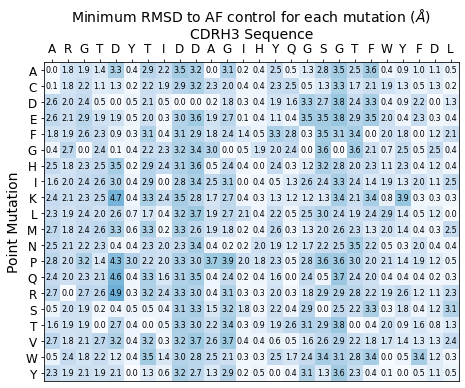

In [43]:
CDRH3 = ['A','R','G','T','D','Y','T','I','D','D','A','G','I','H','Y','Q','G','S','G','T','F','W','Y','F','D','L']
residues_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] # mutations

plt.rcParams["figure.figsize"] = [11.50, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.matshow(min_rmsd,cmap='Blues', vmin=0, vmax=1)
ax.set_xticks(np.arange(len(CDRH3)), CDRH3, fontsize=12)
ax.set_yticks(np.arange(len(residues_list)), residues_list, fontsize=12)
ax.tick_params(axis='x',which='both',bottom=False,top=True)

             
ax.set_ylabel('Point Mutation', fontsize=14)
ax.set_xlabel('CDRH3 Sequence', fontsize=14)
ax.xaxis.set_label_position('top')

for i in range(len(CDRH3)):
    for j in range(len(min_rmsd)):
        c = min_rmsd[j][i]*10 # convert from nm to A
        ax.text(i, j, str(c)[0:3], va='center', ha='center', fontsize=8)
        
plt.title("Minimum RMSD to AF control for each mutation ($\\AA$)", fontsize=14)
plt.tight_layout()
plt.show()

In [80]:
np.save("min_rmsd.npy", min_rmsd)